In [1]:
from __future__ import print_function
from __future__ import division

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#from sklearn_pmml_model.ensemble import PMMLForestClassifier

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df =pd.read_csv('./dataset_full.csv')

In [3]:
df.head()

,Number_of_Workers,Number_of_partial_siddhi_apps,DataRate,No of String Attributes in input Stream,No of float Attributes in input Stream,No of double Attributes in input Stream,No of int Attributes in input Stream,No of long Attributes in input Stream,ExternalTmeWindowSize(Sec),ExternalTimeBatch,...,Aggregation function,In built functions,No of Select Operations,No of Insert Operators,No of From operators,Inner Streams,No of string extensions,No of email processor extensions,No of filter conditions,Throughput
0,3,3,3,4,7,2,1,2,30,0,...,3,3,4,4,4,2,0,0,1,209.105079
1,3,6,3,4,7,2,1,2,30,0,...,3,3,4,4,4,2,0,0,1,403.098494
2,3,9,3,4,7,2,1,2,30,0,...,3,3,4,4,4,2,0,0,1,515.373114
3,3,18,3,4,7,2,1,2,30,0,...,3,3,4,4,4,2,0,0,1,717.240405
4,4,4,3,4,7,2,1,2,30,0,...,3,3,4,4,4,2,0,0,1,245.984533


In [4]:
print('Mean:',df['Throughput'].mean())
print('Variance:',df['Throughput'].var())

Mean: 423.4127451463784
Variance: 55404.55703293984


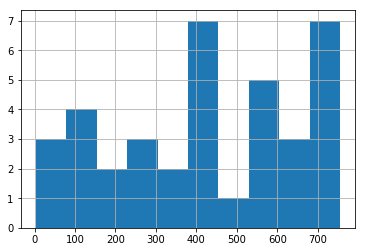

In [5]:
df['Throughput'].hist()

In [6]:
correlations = df.corr()

Text(0.5, 1.0, 'Logprocessor3 Variable Correlations')

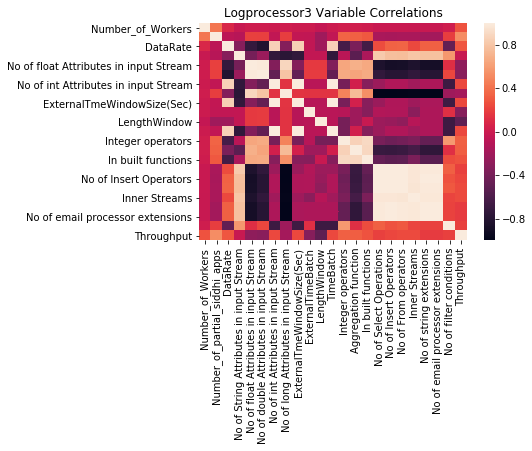

In [7]:
# plot logprocessor
corr_heat = sns.heatmap(correlations)
plt.title('Logprocessor3 Variable Correlations')

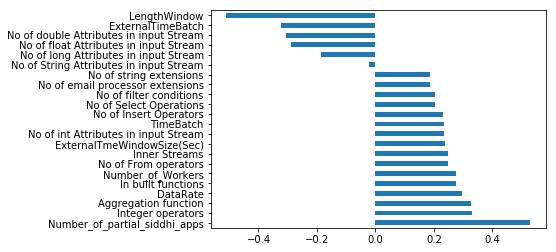

In [8]:
# San Juan
(correlations
     .Throughput
     .drop('Throughput') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [9]:
def preprocess_data(data_path, labels_path=None):
    df = pd.read_csv(data_path)
    All_features = ['Number_of_Workers',
'Number_of_partial_siddhi_apps',
'DataRate',
'No of String Attributes in input Stream',
'No of float Attributes in input Stream',
'No of int Attributes in input Stream',
'No of long Attributes in input Stream',
'ExternalTimeBatch',
'TimeBatch',
'Integer operators',
'Aggregation function',
'In built functions',
'No of Select Operations',
'No of Insert Operators',
'No of From operators',
'Inner Streams',
'No of string extensions',
'No of email processor extensions',
'No of filter conditions'
]
    # select features we want
    features = ['Number_of_Workers',
'Number_of_partial_siddhi_apps',
'DataRate',
'No of String Attributes in input Stream',
'No of float Attributes in input Stream'
]
    df = df[features]
# fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path)
        return df,labels
        #df = df.join(labels)
    
    return df

In [10]:
df,labels = preprocess_data('./dataset_full.csv','./labels_full.csv')


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=143)

In [12]:
# Labels are the values we want to predict
labels = np.array(labels)

In [13]:
features = np.array(df)

In [14]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 160)

In [15]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (29, 5)
Training Labels Shape: (29, 1)
Testing Features Shape: (8, 5)
Testing Labels Shape: (8, 1)


In [16]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=1000, max_depth=10,random_state=50)
# Train the model on training data
rf.fit(train_features, train_labels);

In [17]:
predictions_random_forest = rf.predict(test_features)
from nyoka import skl_to_pmml

In [18]:
train_labels = pd.DataFrame(train_labels)

In [19]:
features = ['Number_of_Workers',
'Number_of_partial_siddhi_apps',
'DataRate',
'No of String Attributes in input Stream',
'No of float Attributes in input Stream'
]

target = 'throughput'

In [20]:
pipeline_obj = Pipeline([
    ('scaler', StandardScaler()),
    ("rfc", RandomForestClassifier(n_estimators=1000, max_depth=10,random_state=50))
])
pipeline_obj.fit(train_features.astype('int'),train_labels.astype('int'))

#from nyoka import skl_to_pmml
#skl_to_pmml(pipeline_obj,features,target,"/home/madushi/Predicting_Number_of_Workers/pmml/random-forest-predictor.pmml")

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=10,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=50,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [21]:
root_mean_squared_error_random_forest = mean_squared_error(test_labels, predictions_random_forest)**0.5
print("root_mean_squared_error_random_forest: %f" % (root_mean_squared_error_random_forest))

root_mean_squared_error_random_forest: 71.441479


In [22]:
regressor = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 1, max_depth = 5, alpha = 10, n_estimators = 1000)
regressor.fit(X_train, y_train)

predictions_XGBoost = regressor.predict(X_test)


In [23]:
test_labels

array([[583.1      ],
       [618.9809612],
       [209.1050792],
       [449.9349263],
       [254.7509169],
       [720.1177737],
       [565.9319567],
       [545.5287716]])

In [24]:
def percentage_error(y_true, y_pred):
    print("y_pred = ",y_pred)
    print("y_true = ",y_true)
    
    array_len = len(np.abs(y_true - y_pred))
    error_sum = 0
    
    for i in range(0,array_len,):
        error_sum+=(np.abs(y_true - y_pred)[i][i])/y_true[i]
        print (error_sum)
       # print (array_len)
        #print ((error_sum/array_len))
    return  (error_sum/array_len)* 100

print("Calculated percentage MAPE =","%.2f"%(percentage_error(test_labels, predictions_random_forest)),"%")

y_pred =  [562.48097473 545.81991924 299.14239545 435.6037678  193.40335822
 699.54470493 500.1797894  410.50590226]
y_true =  [[583.1      ]
 [618.9809612]
 [209.1050792]
 [449.9349263]
 [254.7509169]
 [720.1177737]
 [565.9319567]
 [545.5287716]]
[0.03536104]
[0.15355699]
[0.58414106]
[0.61599269]
[0.85680658]
[0.88537561]
[1.00155948]
[1.24906773]
Calculated percentage MAPE = 15.61 %


In [25]:
print("Accuracy =","%.2f"% (100-percentage_error(test_labels, predictions_random_forest)),"%")

y_pred =  [562.48097473 545.81991924 299.14239545 435.6037678  193.40335822
 699.54470493 500.1797894  410.50590226]
y_true =  [[583.1      ]
 [618.9809612]
 [209.1050792]
 [449.9349263]
 [254.7509169]
 [720.1177737]
 [565.9319567]
 [545.5287716]]
[0.03536104]
[0.15355699]
[0.58414106]
[0.61599269]
[0.85680658]
[0.88537561]
[1.00155948]
[1.24906773]
Accuracy = 84.39 %


In [26]:
#predict throughput for a sample dataset
sample_test = preprocess_data('./Sample.csv')

In [27]:
predictions_random_forest_sample = rf.predict(np.array(sample_test))

In [28]:
test_probs_sample =predictions_random_forest_sample
test_probs_sample

array([473.65037549, 473.65037549, 473.65037549, 473.65037549,
       482.05094993, 474.58459298, 577.88614819, 577.88614819,
       577.88614819, 466.15977725, 408.85185311, 559.76289958,
       559.76289958, 581.32518116, 581.32518116, 581.32518116,
       475.77945425, 482.05094993, 473.65037549, 577.88614819,
       559.76289958, 473.65037549, 577.88614819, 559.76289958,
       473.65037549, 408.85185311, 577.88614819, 473.65037549,
       577.88614819, 559.76289958, 473.65037549, 577.88614819,
       559.76289958, 408.85185311, 482.05094993, 474.58459298,
       577.88614819])

In [29]:
sample_test['Throughput']=test_probs_sample

In [30]:
sample_test[['Throughput']].head()

,Throughput
0,473.650375
1,473.650375
2,473.650375
3,473.650375
4,482.050950


In [31]:
#print the result to the csv file
sample_test.to_csv("./Sample_Output.csv")